<a href="https://colab.research.google.com/github/artanebibi/datascience/blob/main/User_Behavior_Class_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/artanebibi/Datasets/refs/heads/main/user_behavior_data(2).csv')

In [74]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,NaN,22.0,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,NaN,59.0,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457.0,50.0,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224.0,44.0,Male,1


In [75]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,70
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),140
Age,35
Gender,0


In [76]:
df['Device Model']

,Device Model
0,Google Pixel 5
1,OnePlus 9
2,Xiaomi Mi 11
3,Google Pixel 5
4,iPhone 12
...,...
695,iPhone 12
696,Xiaomi Mi 11
697,Google Pixel 5
698,Samsung Galaxy S21


In [77]:
for index, row in df.iterrows():
    if pd.isna(row['Operating System']):
        df.at[index, 'Operating System'] = 'iOS' if "iPhone" in row['Device Model'] else 'Android'

In [78]:
set(df['Operating System'])

{'Android', 'iOS'}

In [79]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),140
Age,35
Gender,0


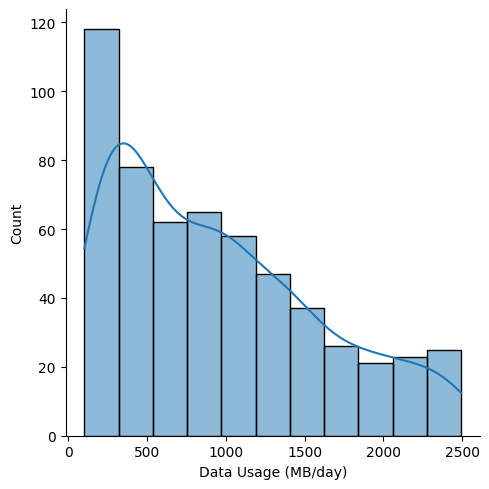

In [80]:
sns.displot(df['Data Usage (MB/day)'], kde = True)

In [81]:
df['Data Usage (MB/day)'].fillna(value = df['Data Usage (MB/day)'].median(), inplace=True)

<ipython-input-81-8b6f1319dc51>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Data Usage (MB/day)'].fillna(value = df['Data Usage (MB/day)'].median(), inplace=True)


In [82]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,35
Gender,0


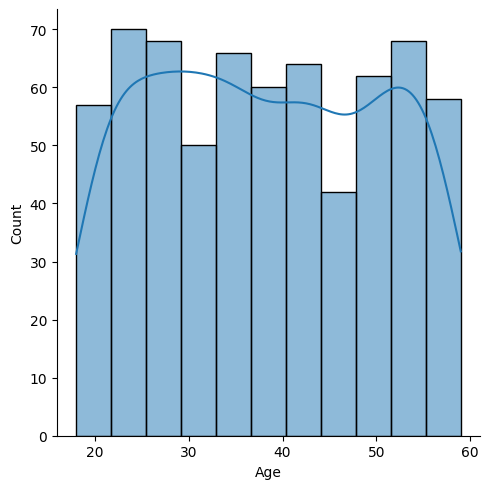

In [83]:
sns.displot(df['Age'], kde = True)

In [84]:
df['Age'].fillna(value = df['Age'].median(), inplace=True)

<ipython-input-84-a9688f170ef8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value = df['Age'].median(), inplace=True)


In [85]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [86]:
df.drop(columns = 'User ID', axis = 1, inplace=True)

In [87]:
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,827.5,42.0,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,827.5,22.0,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,827.5,59.0,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457.0,50.0,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224.0,44.0,Male,1


In [88]:
label = LabelEncoder()
df['Device Model'] = label.fit_transform(df['Device Model'])

In [89]:
df = pd.get_dummies(df, columns = ['Operating System', 'Gender'])

In [90]:
df = df.replace(True, 1).replace(False, 0)

<ipython-input-90-bde73959a027>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(True, 1).replace(False, 0)


In [91]:
df

,Device Model,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,0,393,6.4,1872,67,1122.0,40.0,4,1,0,0,1
1,1,268,4.7,1331,42,944.0,47.0,3,1,0,1,0
2,3,154,4.0,761,32,827.5,42.0,2,1,0,0,1
3,0,239,4.8,1676,56,871.0,20.0,3,1,0,0,1
4,4,187,4.3,1367,58,988.0,31.0,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,4,92,3.9,1082,26,827.5,22.0,2,0,1,0,1
696,3,316,6.8,1965,68,827.5,59.0,4,1,0,0,1
697,0,99,3.1,942,22,457.0,50.0,2,1,0,1,0
698,2,62,1.7,431,13,224.0,44.0,1,1,0,0,1


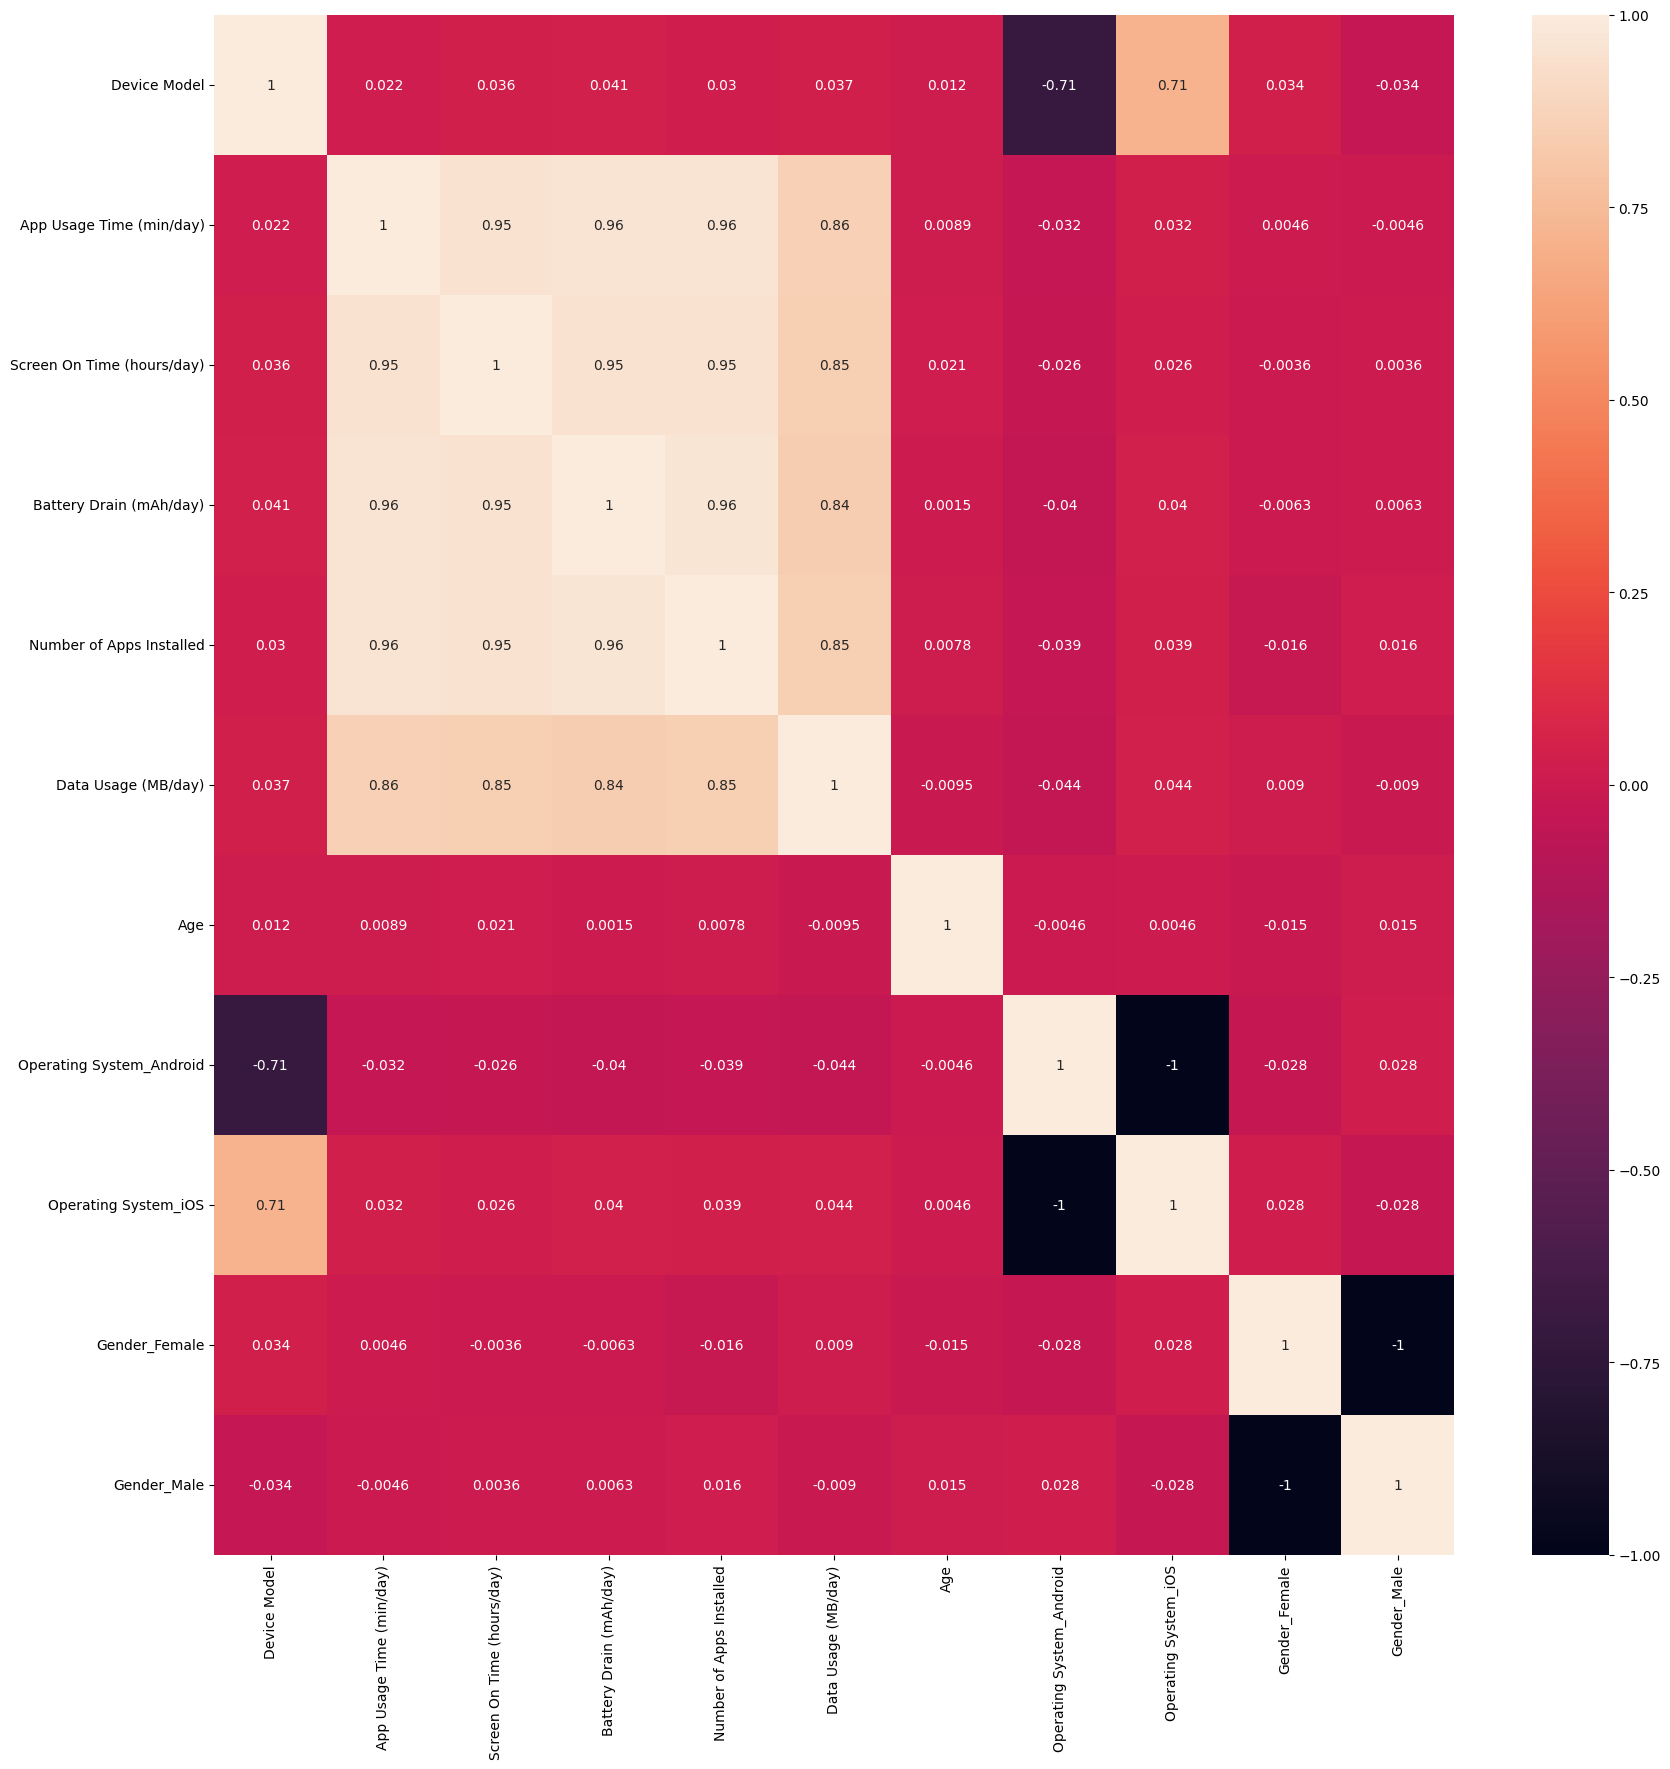

In [95]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.drop(columns = 'User Behavior Class', axis = 1).corr(), annot = True)
plt.show()

In [106]:
# we can see above that screen on time and usage time tell duplicate information. so i will drop one of them
selected = ['Device Model', 'App Usage Time (min/day)', 'Data Usage (MB/day)', 'Age',	'Operating System_Android',	'Operating System_iOS', 'Gender_Female', 'Gender_Male']

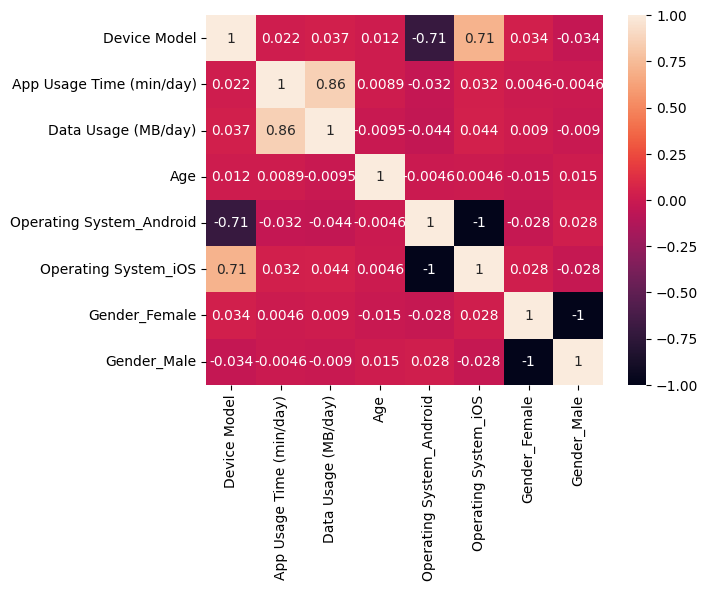

In [107]:
sns.heatmap(df[selected].corr(), annot = True)
plt.show()

In [105]:
x, y = df[selected], df['User Behavior Class']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 1706)

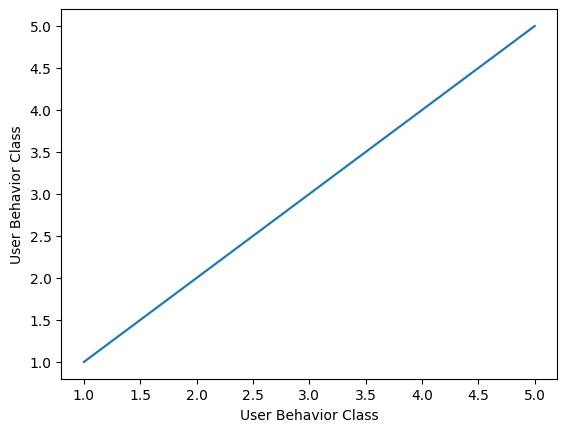

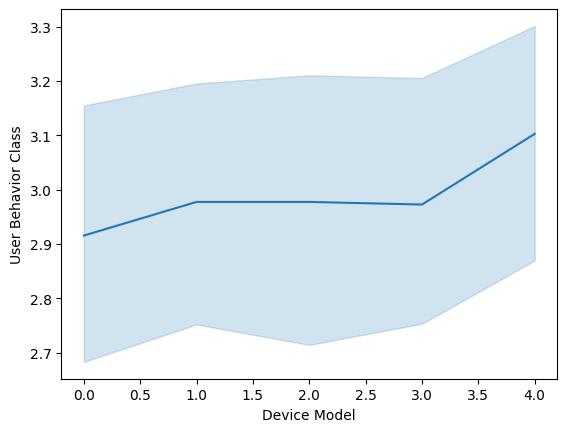

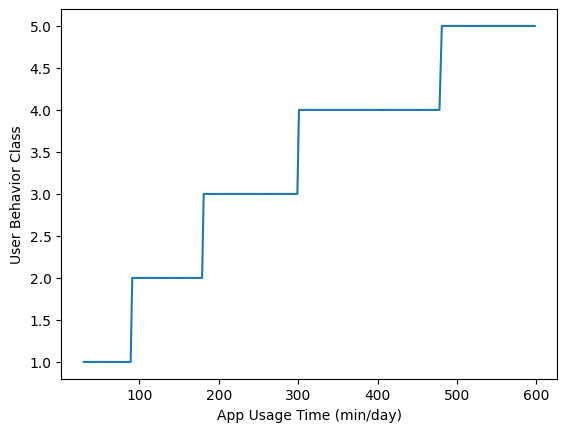

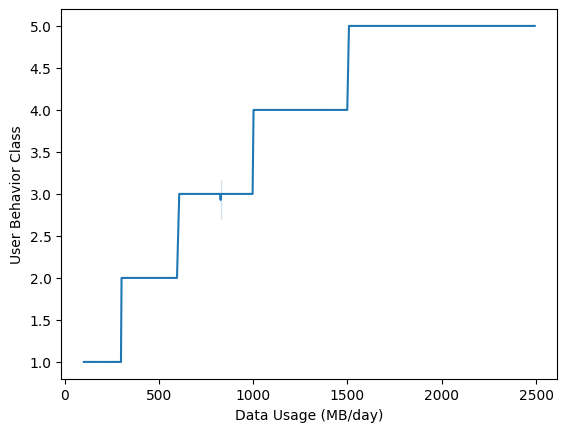

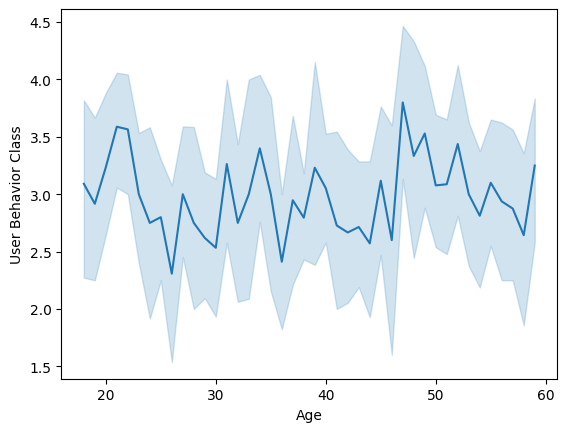

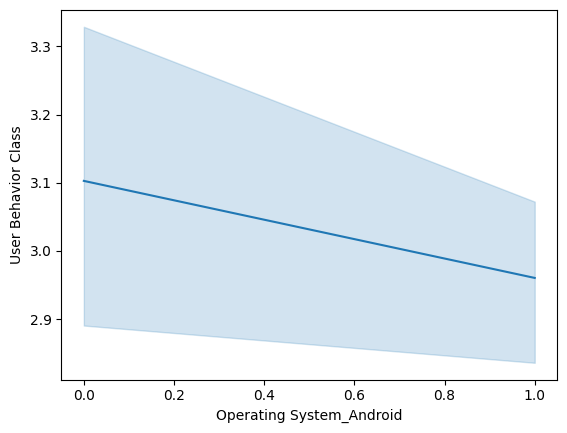

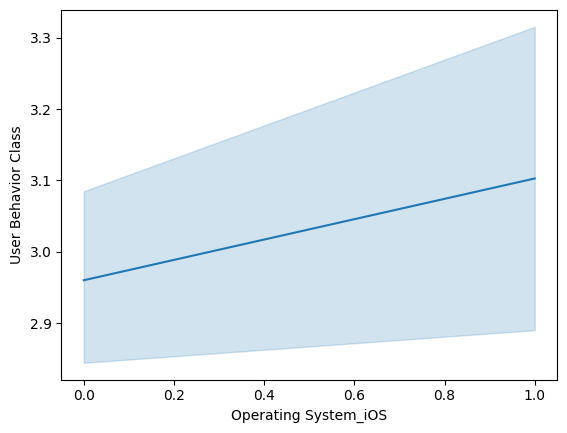

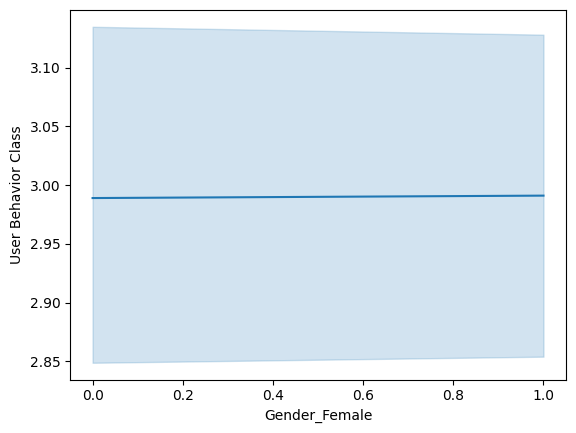

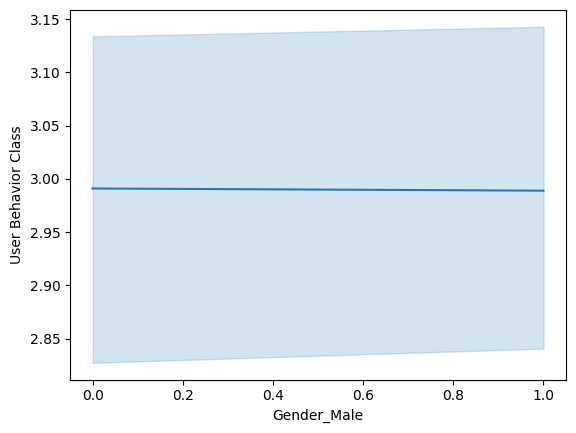

In [112]:
selected = ['User Behavior Class', 'Device Model', 'App Usage Time (min/day)', 'Data Usage (MB/day)', 'Age',	'Operating System_Android',	'Operating System_iOS', 'Gender_Female', 'Gender_Male']
for f in selected:
  sns.lineplot(data = df[selected], x = f, y = 'User Behavior Class')
  plt.show()

In [113]:
# non - linear, classification, small dataset, its Almost balanced (ill take it as balanced), high correlation between some of the features but i dropped them
# best model for this would be... :

In [115]:
df['User Behavior Class'].value_counts()

,count
User Behavior Class,
2,146
3,143
4,139
5,136
1,136


In [134]:
rf = LogisticRegression()
rf.fit(trainX, trainY)
pred_y = rf.predict(testX)
print(f1_score(testY, pred_y, average='weighted'))

0.589035336356765


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**DEEP TREES AND DEEPLEARNING WONT WORK ON SMALL DATASETS**

In [135]:
rf = RandomForestClassifier()
rf.fit(trainX, trainY)
pred_y = rf.predict(testX)
print(f1_score(testY, pred_y, average='weighted'))

1.0
